## Class imbalance ⚖️ : Cost-sensitive Learning 🔨

After this encounter you will 
- understand what class imbalance means and why it is a problem when predicting (binomial) classes
- be sensitized for parameters which are important when handling imbalanced data
- be aware of techniques applicable to the Logistic Regression in order to "handle" class imbalance
- be sensitized for the importance of correctly selecting metrics in dependence of the problem at hand

In [2]:
def printEvaluations (clf, X_train, X_test, y_test):        
    """Returns Confusion Matrix and relevant metrics for predictions of classifiers.
    Takes classification model and split data."""
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)   
    print(f'How does model {clf} score:')
    print(f'The accuracy of the model is: {round(accuracy_score(y_test, y_pred), 3)}')
    print(f'The precision of the model is: {round(precision_score(y_test, y_pred), 3)}')
    print(f'The recall of the model is: {round(recall_score(y_test, y_pred), 3)}')

    #print confusion matrix
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap='Greens')

## I. What is class imbalance and why could it be a problem for making predictions?

#### Let's use the "creditcard" dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay,f1_score
from sklearn.preprocessing import MinMaxScaler
#import imblearn.over_sampling import RandomOverSampler

In [4]:
df=pd.read_csv("creditcard.zip",index_col=0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 284806
Data columns (total 28 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V15     284807 non-null  float64
 14  V16     284807 non-null  float64
 15  V18     284807 non-null  float64
 16  V19     284807 non-null  float64
 17  V20     284807 non-null  float64
 18  V21     284807 non-null  float64
 19  V22     284807 non-null  float64
 20  V23     284807 non-null  float64
 21  V24     28

In [6]:
df["Class"].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

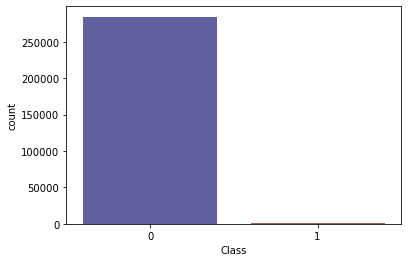

In [7]:
colors=["blue","red"]
sns.countplot("Class",data=df,palette=colors,saturation=0.25)

Baseline classifier:

In [8]:
baseline_clf=np.zeros(df["Class"].shape[0])
baseline_clf

array([0., 0., 0., ..., 0., 0., 0.])

In [9]:
round(accuracy_score(df["Class"],baseline_clf),3)

0.998

## II. How can we deal with the challenge of bias of our model towards majority class? 
#### => apply cost-sensitive learning 🔨!
#### optionally: apply under-/oversampling techniques (see course materials)📱...

- Fitting a simple **LogReg model**. Correspondent **loss function**:

$$ loss(ypred_{i}, y_{i}) = - (log(ypred_{i}) * y_{i} + log(1 - ypred_{i}) * (1 - y_{i}))$$ 

In [10]:
X=df.iloc[:,:-1]
y=df["Class"]
X.shape,y.shape

((284807, 27), (284807,))

In [11]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,stratify=y)

In [13]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((213605, 27), (71202, 27), (213605,), (71202,))

In [14]:
y.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [15]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

- Scaling data:

In [16]:
scaler=MinMaxScaler()


In [17]:
X_train_scaled=scaler.fit_transform(X_train)

In [18]:
X_test_scaled=scaler.transform(X_test)

- Fit:

In [19]:
LogReg_clf=LogisticRegression(class_weight=None,random_state=42,max_iter=1000)

In [20]:
LogReg_clf.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000, random_state=42)

How does model LogisticRegression(max_iter=1000, random_state=42) score:
The accuracy of the model is: 0.999
The precision of the model is: 0.785
The recall of the model is: 0.415


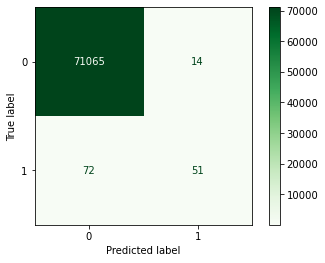

In [21]:
printEvaluations(LogReg_clf,X_train_scaled,X_test_scaled,y_test)

## Enter the cost-sensitized LogReg classifier
- LogReg algo can be modified to be better suited for imbalanced classification by means of introducing weights:
    - the weighting can **penalize the model less** for **errors made on examples from the majority class** and penalize the model **more for errors made on examples from the minority class**.
    - a **larger weight** value results in a **larger error calculation**, and in turn, **more update** to the model **coefficients** (and vice versa)

$$ loss(ypred_{i}, y_{i}) = - (pen_{0} * log(ypred_{i}) * y_{i} + pen_{1} * log(1 - ypred_{i}) * (1 - y_{i}))$$ 

In [22]:
weights_counter={0:0.02,1:0.98}

In [23]:
def weightedLogReg (class_weight, X_train, X_test, y_test):
    """Returns Confusion Matrix and relevant metrics for predictions of LogReg classifier.
    Takes different weight combinations and split data."""
    clf_weighted = LogisticRegression(random_state=42, class_weight=class_weight, max_iter= 10000)
    printEvaluations(clf_weighted, X_train_scaled, X_test_scaled, y_test)
    

How does model LogisticRegression(class_weight={0: 0.02, 1: 0.98}, max_iter=10000,
                   random_state=42) score:
The accuracy of the model is: 0.999
The precision of the model is: 0.722
The recall of the model is: 0.634


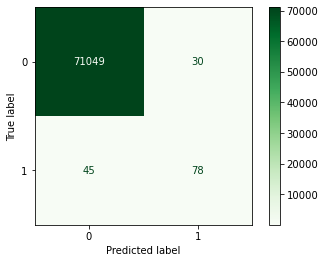

In [24]:
weightedLogReg(class_weight=weights_counter,
X_train=X_train_scaled,
X_test=X_test_scaled,
y_test=y_test

)

In [25]:
weights_one_order={0:1,1:10}

How does model LogisticRegression(class_weight={0: 1, 1: 10}, max_iter=10000, random_state=42) score:
The accuracy of the model is: 0.999
The precision of the model is: 0.765
The recall of the model is: 0.74


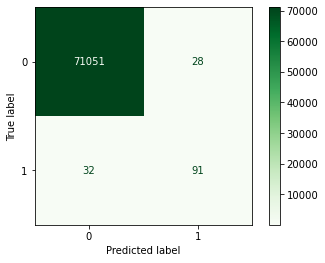

In [26]:
weightedLogReg(class_weight=weights_one_order,
X_train=X_train_scaled,
X_test=X_test_scaled,
y_test=y_test)





